# Objectives
- 1. 서울시 공공자전거 대여소별 구별 대여건수 시각화 

# Function

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#---------
#한글깨짐방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
#----------
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# Data Load

## 공공자전거 대여소별 대여건수

### 대여소별 대여내역(2015)

In [78]:
file_path1= 'D:\Code\서울시 따릉이!\자전거 대여소별 대여 및 반납 내역/대여소별 대여내역(2015년).csv'

df_rent_2015 = pd.read_csv(file_path1,encoding='cp949')

print(df_rent_2015)

print('*'*80)

df_rent_2015.drop([0,0], axis=0, inplace=True)
print(df_rent_2015)

df_rent_2015.isnull().sum()

       대여소 그룹              대여소 명   대여 일자 / 월  대여 건수
0      그룹명 없음            대여소명 없음  2015-09-19      0
1         마포구   101. (구)합정동 주민센터  2015-09-19      5
2         마포구    102. 망원역 1번출구 앞  2015-09-19     13
3         마포구    103. 망원역 2번출구 앞  2015-09-19     18
4         마포구    104. 합정역 1번출구 앞  2015-09-19     11
...       ...                ...         ...    ...
12469      중구   324. 신세계백화점 본점 앞  2015-12-31      1
12470      중구  331. 을지로2가 사거리 북측  2015-12-31      1
12471      중구  332. 을지로2가 사거리 남측  2015-12-31      1
12472      중구      336. 티마크 호텔 앞  2015-12-31      8
12473      중구        346. 맥스타일 앞  2015-12-31      1

[12474 rows x 4 columns]
********************************************************************************
      대여소 그룹              대여소 명   대여 일자 / 월  대여 건수
1        마포구   101. (구)합정동 주민센터  2015-09-19      5
2        마포구    102. 망원역 1번출구 앞  2015-09-19     13
3        마포구    103. 망원역 2번출구 앞  2015-09-19     18
4        마포구    104. 합정역 1번출구 앞  2015-09-19     11
5        마포구  

대여소 그룹       0
대여소 명        0
대여 일자 / 월    0
대여 건수        0
dtype: int64

### 한글명 컬럼을 영어로 변환

In [79]:
df_rent_2015.columns=['Rent_Place','Place_Name','Rent_Date', 'Rent_Counts']
print(df_rent_2015)

      Rent_Place         Place_Name   Rent_Date  Rent_Counts
1            마포구   101. (구)합정동 주민센터  2015-09-19            5
2            마포구    102. 망원역 1번출구 앞  2015-09-19           13
3            마포구    103. 망원역 2번출구 앞  2015-09-19           18
4            마포구    104. 합정역 1번출구 앞  2015-09-19           11
5            마포구    105. 합정역 5번출구 앞  2015-09-19           15
...          ...                ...         ...          ...
12469         중구   324. 신세계백화점 본점 앞  2015-12-31            1
12470         중구  331. 을지로2가 사거리 북측  2015-12-31            1
12471         중구  332. 을지로2가 사거리 남측  2015-12-31            1
12472         중구      336. 티마크 호텔 앞  2015-12-31            8
12473         중구        346. 맥스타일 앞  2015-12-31            1

[12473 rows x 4 columns]


In [80]:
counts = df_rent_2015.loc[:,'Rent_Place'].value_counts()

print(f'대여소 그룹별 대여 건수 : \n{counts}')

대여소 그룹별 대여 건수 : 
Rent_Place
마포구       3984
영등포구      2527
종로구       2034
서대문구      1306
중구        1201
성동구        642
광진구        592
그룹명 없음     187
Name: count, dtype: int64


In [81]:
ratio = df_rent_2015.loc[:,'Rent_Place'].value_counts(normalize=True)
print(f'대여소 그룹별 대여 건수에 대한 비율 : \n{ratio}')

대여소 그룹별 대여 건수에 대한 비율 : 
Rent_Place
마포구       0.319410
영등포구      0.202598
종로구       0.163072
서대문구      0.104706
중구        0.096288
성동구       0.051471
광진구       0.047463
그룹명 없음    0.014992
Name: proportion, dtype: float64


### One-Hot Encoding으로 인덱스값 전부 영어로 변경

In [82]:
df_onehot_2015 = pd.get_dummies(data=df_rent_2015, columns=['Rent_Place','Place_Name','Rent_Date','Rent_Counts'])

print(df_onehot_2015)

       Rent_Place_광진구  Rent_Place_그룹명 없음  Rent_Place_마포구  Rent_Place_서대문구  \
1               False              False            True            False   
2               False              False            True            False   
3               False              False            True            False   
4               False              False            True            False   
5               False              False            True            False   
...               ...                ...             ...              ...   
12469           False              False           False            False   
12470           False              False           False            False   
12471           False              False           False            False   
12472           False              False           False            False   
12473           False              False           False            False   

       Rent_Place_성동구  Rent_Place_영등포구  Rent_Place_종로구  Rent_Place_중구  \
1 

### Visualization

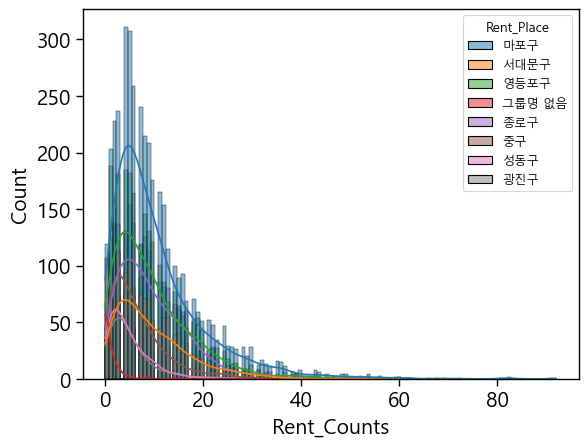

In [127]:
sns.set_context('paper', # notebook, talk, poster
                rc={'font.size':15, 
                    'xtick.labelsize':15, 
                    'ytick.labelsize':15, 
                    'axes.labelsize':15})

sns.histplot(data=df_rent_2015, x='Rent_Counts', hue='Rent_Place',kde=True)	
plt.show()

### 대여소별 대여내역(2016)

In [84]:
file_path2= 'D:\Code\서울시 따릉이!\자전거 대여소별 대여 및 반납 내역/대여소별 대여내역(2016년).csv'

df_rent_2016 = pd.read_csv(file_path2,encoding='cp949')

print(df_rent_2016)

print('*'*80)

df_rent_2016.drop([0,0], axis=0, inplace=True)
print(df_rent_2016)

df_rent_2016.isnull().sum()

       대여소 그룹                대여소 명   대여 일자 / 월  대여 건수
0      그룹명 없음              대여소명 없음  2016-01-01      0
1         광진구  500. 어린이대공원역 3번출구 앞  2016-01-01      7
2         광진구         501. 광진구의회 앞  2016-01-01      0
3         광진구   502. 뚝섬유원지역 1번출구 앞  2016-01-01      9
4         광진구     503. 더샵스타시티 C동 앞  2016-01-01      8
...       ...                  ...         ...    ...
99824      중구           381. 장충체육관  2016-12-31      1
99825      중구     382. 약수역 10번출구 앞  2016-12-31      5
99826      중구    383. 신당역 12번 출구 뒤  2016-12-31      5
99827      중구          384. 종로학원본원  2016-12-31      5
99828      중구      387. 훈련원공원주차장 앞  2016-12-31      3

[99829 rows x 4 columns]
********************************************************************************
      대여소 그룹                대여소 명   대여 일자 / 월  대여 건수
1        광진구  500. 어린이대공원역 3번출구 앞  2016-01-01      7
2        광진구         501. 광진구의회 앞  2016-01-01      0
3        광진구   502. 뚝섬유원지역 1번출구 앞  2016-01-01      9
4        광진구     503. 더샵스타시티 C동 앞

대여소 그룹       0
대여소 명        0
대여 일자 / 월    0
대여 건수        0
dtype: int64

### 대여소별 대여내역(2017)

In [85]:
file_path3= 'D:\Code\서울시 따릉이!\자전거 대여소별 대여 및 반납 내역/대여소별 대여내역(2017년).csv'

df_rent_2017 = pd.read_csv(file_path3,encoding='cp949')

print(df_rent_2017)

print('*'*80)

df_rent_2017.drop([0,0], axis=0, inplace=True)

print(df_rent_2017)

df_rent_2017.isnull().sum()

        대여소 그룹                대여소 명   대여 일자 / 월  대여 건수
0       그룹명 없음              대여소명 없음  2017-01-01      0
1          광진구  500. 어린이대공원역 3번출구 앞  2017-01-01     20
2          광진구         501. 광진구의회 앞  2017-01-01     10
3          광진구   502. 뚝섬유원지역 1번출구 앞  2017-01-01      9
4          광진구     503. 더샵스타시티 C동 앞  2017-01-01      9
...        ...                  ...         ...    ...
245441     중랑구  1442. (구)신한은행 중랑교지점  2017-12-31      3
245442     중랑구          1445. 용마지구대  2017-12-31      1
245443     중랑구      1446. 중랑전화국 교차로  2017-12-31      3
245444     중랑구       1447. 면목역 3번출구  2017-12-31      1
245445     중랑구       1448. 코스트코 상봉점  2017-12-31     10

[245446 rows x 4 columns]
********************************************************************************
       대여소 그룹                대여소 명   대여 일자 / 월  대여 건수
1         광진구  500. 어린이대공원역 3번출구 앞  2017-01-01     20
2         광진구         501. 광진구의회 앞  2017-01-01     10
3         광진구   502. 뚝섬유원지역 1번출구 앞  2017-01-01      9
4         광진구   

대여소 그룹       0
대여소 명        0
대여 일자 / 월    0
대여 건수        0
dtype: int64

### 대여소별 대여건수 pd.concat

In [86]:
concat1 = pd.concat([df_rent_2015, df_rent_2016, df_rent_2017],
                     axis=0, 
                     join='inner')

print(f'대여소별 대여건수 병합 출력 : \n{concat1}')

concat1.isnull().sum()

print('*'*80)

df_concat_rent = concat1.reset_index(inplace=False)

print(df_concat_rent)

df_concat_rent.drop(columns=['index'],inplace=True)

print('*'*80)

print(df_concat_rent)

df_concat_rent.isnull().sum()


대여소별 대여건수 병합 출력 : 
Empty DataFrame
Columns: []
Index: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]

[357746 rows x 0 columns]
********************************************************************************
         index
0            1
1            2
2            3
3            4
4            5
...        ...
357741  245441
357742  245442
357743  245443
357744  245444
357745  245445

[357746 rows x 1 columns]
********************************************************************************
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31

Series([], dtype: float64)

## 공공자전거 대여소별 반납건수

### 대여소별 반납내역(2015)

In [87]:
file_path4= 'D:\Code\서울시 따릉이!\자전거 대여소별 대여 및 반납 내역/대여소별 반납내역(2015년).csv'

df_return_2015 = pd.read_csv(file_path4,encoding='cp949')

print(df_return_2015)

print('*'*80)

df_return_2015.drop([0,0],axis=0,inplace=True)
print(df_return_2015)

       대여소 그룹              대여소 명   반납 일자 / 월  반납 건수
0      그룹명 없음            대여소명 없음  2015-09-19     17
1         마포구   101. (구)합정동 주민센터  2015-09-19      8
2         마포구    102. 망원역 1번출구 앞  2015-09-19     14
3         마포구    103. 망원역 2번출구 앞  2015-09-19     19
4         마포구    104. 합정역 1번출구 앞  2015-09-19     10
...       ...                ...         ...    ...
12469      중구   324. 신세계백화점 본점 앞  2015-12-31      1
12470      중구  331. 을지로2가 사거리 북측  2015-12-31      0
12471      중구  332. 을지로2가 사거리 남측  2015-12-31      4
12472      중구      336. 티마크 호텔 앞  2015-12-31      8
12473      중구        346. 맥스타일 앞  2015-12-31      6

[12474 rows x 4 columns]
********************************************************************************
      대여소 그룹              대여소 명   반납 일자 / 월  반납 건수
1        마포구   101. (구)합정동 주민센터  2015-09-19      8
2        마포구    102. 망원역 1번출구 앞  2015-09-19     14
3        마포구    103. 망원역 2번출구 앞  2015-09-19     19
4        마포구    104. 합정역 1번출구 앞  2015-09-19     10
5        마포구  

### 대여소별 반납내역(2016)

In [88]:
file_path5= 'D:\Code\서울시 따릉이!\자전거 대여소별 대여 및 반납 내역/대여소별 반납내역(2016년).csv'

df_return_2016 = pd.read_csv(file_path5,encoding='cp949')

print(df_return_2016)

print('*'*80)

df_return_2016.drop([0,0],axis=0,inplace=True)

print(df_return_2016)


       대여소 그룹                대여소 명   반납 일자 / 월  반납 건수
0      그룹명 없음              대여소명 없음  2016-01-01      3
1         광진구  500. 어린이대공원역 3번출구 앞  2016-01-01      5
2         광진구         501. 광진구의회 앞  2016-01-01      7
3         광진구   502. 뚝섬유원지역 1번출구 앞  2016-01-01      8
4         광진구     503. 더샵스타시티 C동 앞  2016-01-01      5
...       ...                  ...         ...    ...
99824      중구           381. 장충체육관  2016-12-31      1
99825      중구     382. 약수역 10번출구 앞  2016-12-31      2
99826      중구    383. 신당역 12번 출구 뒤  2016-12-31      5
99827      중구          384. 종로학원본원  2016-12-31      2
99828      중구      387. 훈련원공원주차장 앞  2016-12-31      5

[99829 rows x 4 columns]
********************************************************************************
      대여소 그룹                대여소 명   반납 일자 / 월  반납 건수
1        광진구  500. 어린이대공원역 3번출구 앞  2016-01-01      5
2        광진구         501. 광진구의회 앞  2016-01-01      7
3        광진구   502. 뚝섬유원지역 1번출구 앞  2016-01-01      8
4        광진구     503. 더샵스타시티 C동 앞

### 대여소별 반납내역(2017)

In [89]:
file_path6= 'D:\Code\서울시 따릉이!\자전거 대여소별 대여 및 반납 내역/대여소별 반납내역(2017년).csv'

df_return_2017 = pd.read_csv(file_path6,encoding='cp949')

print(df_return_2017)

print('*'*80)

df_return_2017.drop([0,0], axis=0, inplace=True)

print(df_return_2017)

        대여소 그룹                대여소 명   반납 일자 / 월  반납 건수
0       그룹명 없음              대여소명 없음  2017-01-01     10
1          광진구  500. 어린이대공원역 3번출구 앞  2017-01-01     12
2          광진구         501. 광진구의회 앞  2017-01-01     10
3          광진구   502. 뚝섬유원지역 1번출구 앞  2017-01-01     13
4          광진구     503. 더샵스타시티 C동 앞  2017-01-01      8
...        ...                  ...         ...    ...
245441     중랑구  1442. (구)신한은행 중랑교지점  2017-12-31      1
245442     중랑구          1445. 용마지구대  2017-12-31      0
245443     중랑구      1446. 중랑전화국 교차로  2017-12-31      2
245444     중랑구       1447. 면목역 3번출구  2017-12-31      2
245445     중랑구       1448. 코스트코 상봉점  2017-12-31      8

[245446 rows x 4 columns]
********************************************************************************
       대여소 그룹                대여소 명   반납 일자 / 월  반납 건수
1         광진구  500. 어린이대공원역 3번출구 앞  2017-01-01     12
2         광진구         501. 광진구의회 앞  2017-01-01     10
3         광진구   502. 뚝섬유원지역 1번출구 앞  2017-01-01     13
4         광진구   

### 대여소별 반납건수 pd.concat

In [90]:
concat2 = pd.concat([df_return_2015,
                     df_return_2016,
                     df_return_2017],
                    axis=0,
                    join='inner'
)

print(f'대여소별 반납건수 병합 출력 : \n{concat2}')

concat2.isnull().sum()

print('*'*80)

df_concat_return = concat2.reset_index(inplace=False)

print(df_concat_return)

df_concat_return.drop(columns=['index'],inplace=True)

print('*'*80)

print(df_concat_return)

df_concat_return.isnull().sum()

대여소별 반납건수 병합 출력 : 
       대여소 그룹                대여소 명   반납 일자 / 월  반납 건수
1         마포구     101. (구)합정동 주민센터  2015-09-19      8
2         마포구      102. 망원역 1번출구 앞  2015-09-19     14
3         마포구      103. 망원역 2번출구 앞  2015-09-19     19
4         마포구      104. 합정역 1번출구 앞  2015-09-19     10
5         마포구      105. 합정역 5번출구 앞  2015-09-19     13
...       ...                  ...         ...    ...
245441    중랑구  1442. (구)신한은행 중랑교지점  2017-12-31      1
245442    중랑구          1445. 용마지구대  2017-12-31      0
245443    중랑구      1446. 중랑전화국 교차로  2017-12-31      2
245444    중랑구       1447. 면목역 3번출구  2017-12-31      2
245445    중랑구       1448. 코스트코 상봉점  2017-12-31      8

[357746 rows x 4 columns]
********************************************************************************
         index 대여소 그룹                대여소 명   반납 일자 / 월  반납 건수
0            1    마포구     101. (구)합정동 주민센터  2015-09-19      8
1            2    마포구      102. 망원역 1번출구 앞  2015-09-19     14
2            3    마포구      103. 망원역 2번출

대여소 그룹       0
대여소 명        0
반납 일자 / 월    0
반납 건수        0
dtype: int64